<a href="https://colab.research.google.com/github/SBMCODED/A-Comparative-Study-of-Ensemble-and-Supervised-Machine-Learning-Methods-in-Analyzing-Nestle-Data/blob/main/cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve,auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Include the File path and Load it
file_path = '/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv'
df = pd.read_csv(file_path)


In [4]:
df.shape

(1000, 14)

In [5]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [7]:
df.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


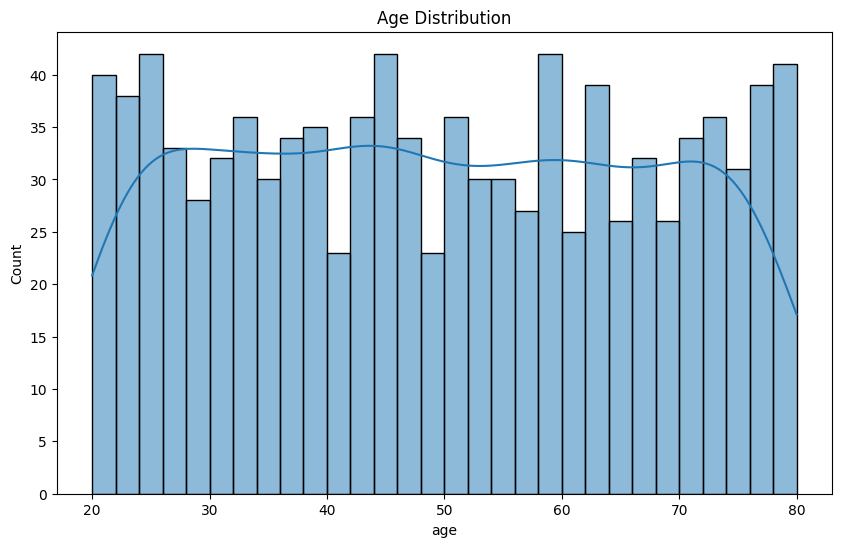

In [8]:
# Visualization 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

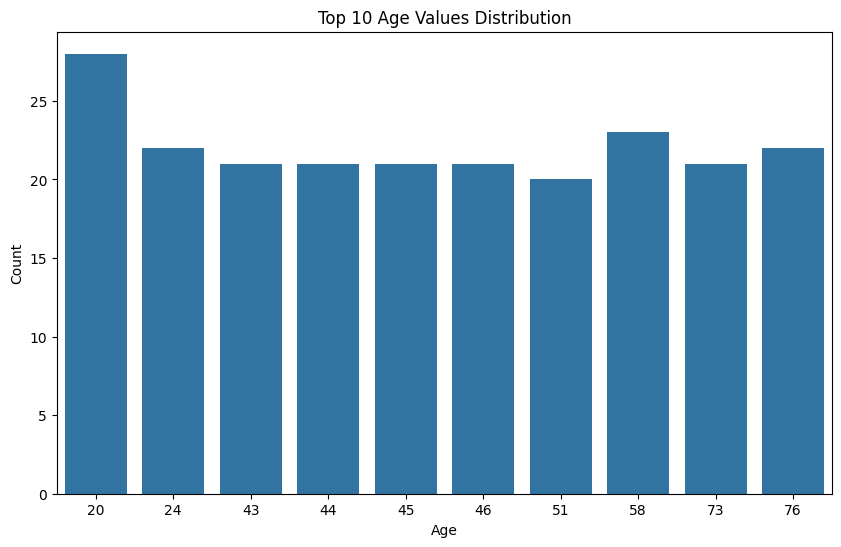

In [9]:
# Visualization 2: Barplot of Age Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=df['age'].value_counts().index[:10], y=df['age'].value_counts().values[:10])
plt.title('Top 10 Age Values Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


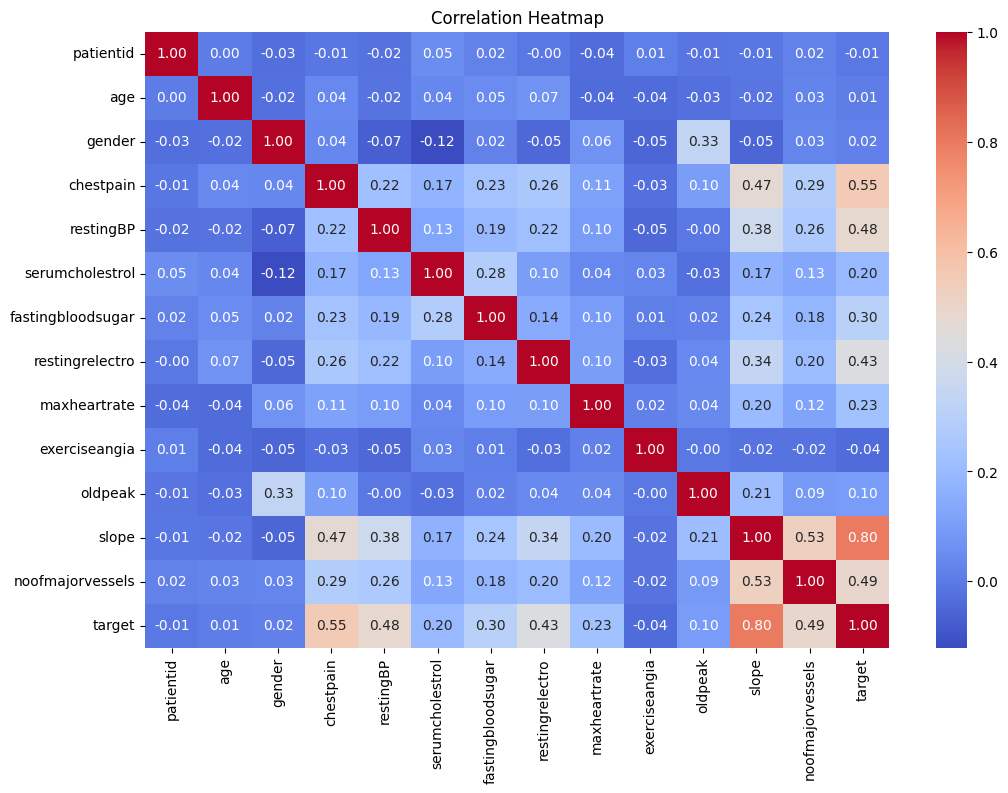

In [10]:
# Visualization 3: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

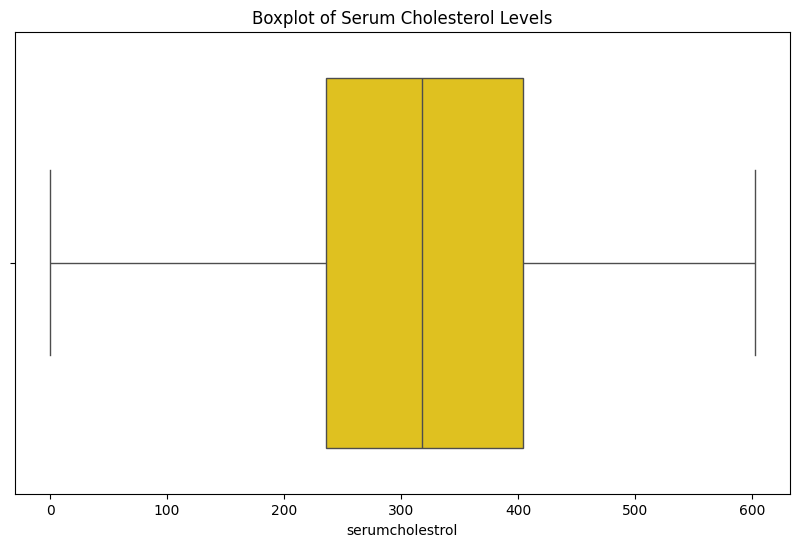

In [11]:
# Visualization 4: Boxplot of Serum Cholesterol Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='serumcholestrol', color='gold')
plt.title('Boxplot of Serum Cholesterol Levels')
plt.show()


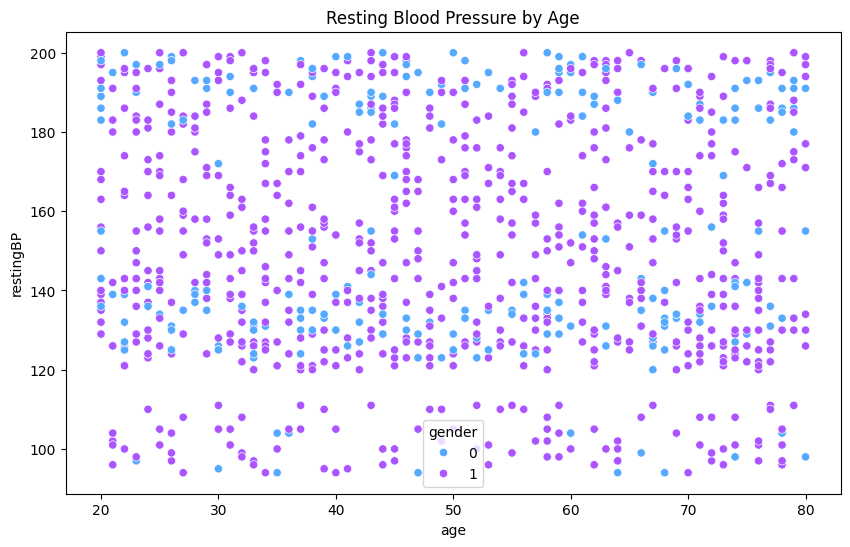

In [12]:
# Visualization 5: Resting Blood Pressure by Age Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='restingBP', hue='gender', palette='cool')
plt.title('Resting Blood Pressure by Age')
plt.show()

<ipython-input-13-afef4851db1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='chestpain', palette='mako')


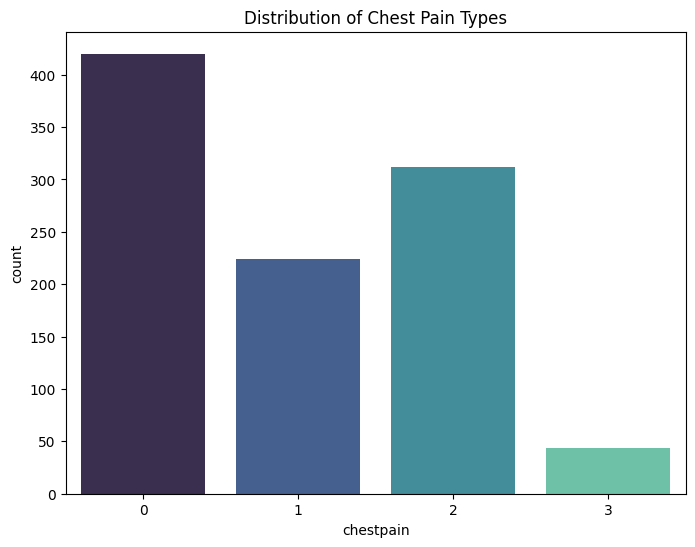

In [13]:
# Visualization 6: Count Plot for Chest Pain Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='chestpain', palette='mako')
plt.title('Distribution of Chest Pain Types')
plt.show()


In [14]:
# Count Male and Female patients
gender_counts = df['gender'].value_counts()
print("\nTotal Male and Female Patients:")
print(f"Male: {gender_counts.get(1, 0)}, Female: {gender_counts.get(0, 0)}")


Total Male and Female Patients:
Male: 765, Female: 235


In [15]:
# Count Target (0: Normal, 1: Cardiovascular Disease)
target_counts = df['target'].value_counts()
print("\nTarget Distribution:")
print(f"Normal (0): {target_counts.get(0, 0)}, Cardiovascular Disease (1): {target_counts.get(1, 0)}")



Target Distribution:
Normal (0): 420, Cardiovascular Disease (1): 580


<ipython-input-16-b64a9edd609e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


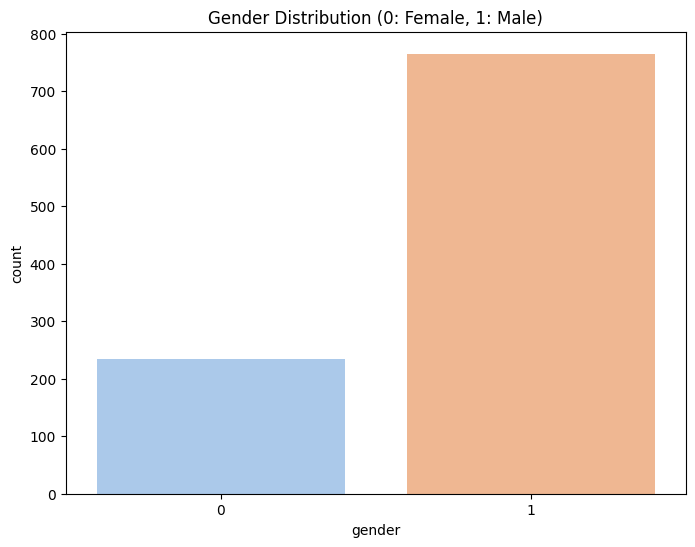

In [16]:
# Visualization 1: Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution (0: Female, 1: Male)')
plt.show()

<ipython-input-17-584f036948c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='coolwarm')


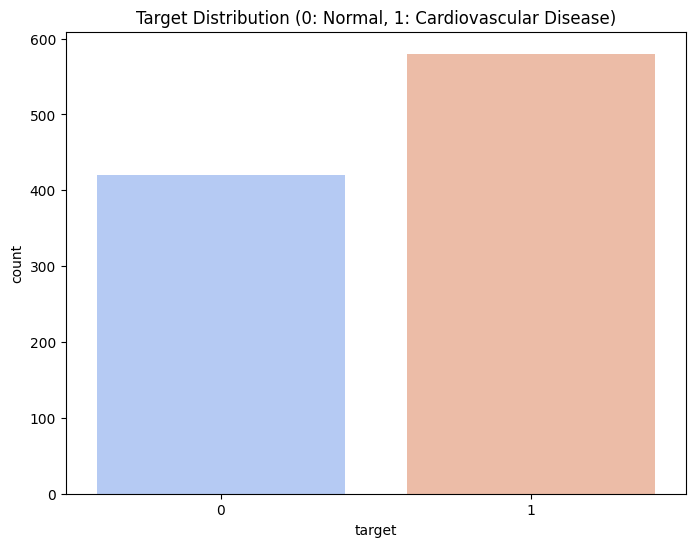

In [17]:
# Visualization 2: Target Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', palette='coolwarm')
plt.title('Target Distribution (0: Normal, 1: Cardiovascular Disease)')
plt.show()

preprocessing

In [18]:
# Define features and target
X = df.drop(columns=['target'])  # Ensure 'target' is the correct column name
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#instanciation
svm=SVC()
knn=KNeighborsClassifier()
g=GaussianNB()
log=LogisticRegression()

In [21]:
svm=svm.fit(X_train,y_train)
knn=knn.fit(X_train,y_train)
g=g.fit(X_train,y_train)
log=log.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
SVC_pred=svm.predict(X_test)
KNN_pred=knn.predict(X_test)
g_pred=g.predict(X_test)
LOG_pred=log.predict(X_test)

In [23]:
print('SVC_pred')
print(SVC_pred)
print('=================================')
print()

print('KNN prediction')
print(KNN_pred)
print('=================================')
print()

print('g prediction')
print(g_pred)
print('=================================')
print()

print('LOG prediction')
print(LOG_pred)
print('=================================')
print()

SVC_pred
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

KNN prediction
[0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1]

g prediction
[1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1

In [24]:
from sklearn.metrics import accuracy_score
print(f'SVC Accuracy score:{round(accuracy_score(SVC_pred,y_test),2)}')
print(f'KNN Accuracy score:{round(accuracy_score(KNN_pred,y_test),2)}')
print(f'g Accuracy score:{round(accuracy_score(g_pred,y_test),2)}')
print(f'LOG Accuracy score:{round(accuracy_score(LOG_pred,y_test),2)}')

SVC Accuracy score:0.58
KNN Accuracy score:0.52
g Accuracy score:0.81
LOG Accuracy score:0.68


Classification Report for SVC model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.58      1.00      0.74       117

    accuracy                           0.58       200
   macro avg       0.29      0.50      0.37       200
weighted avg       0.34      0.58      0.43       200

Confusion Matrix for SVC model:
 [[  0  83]
 [  0 117]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


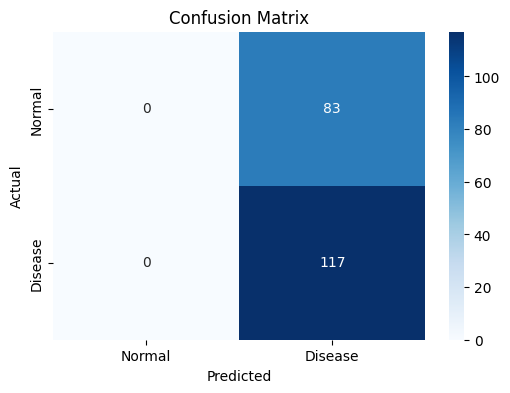

In [25]:
print("Classification Report for SVC model:\n", classification_report(y_test, SVC_pred))
conf_matrix = confusion_matrix(y_test, SVC_pred)
print("Confusion Matrix for SVC model:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Classification Report for KNN model:
               precision    recall  f1-score   support

           0       0.39      0.29      0.33        83
           1       0.57      0.68      0.62       117

    accuracy                           0.52       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.50      0.52      0.50       200

Confusion Matrix for knn model:
 [[24 59]
 [38 79]]


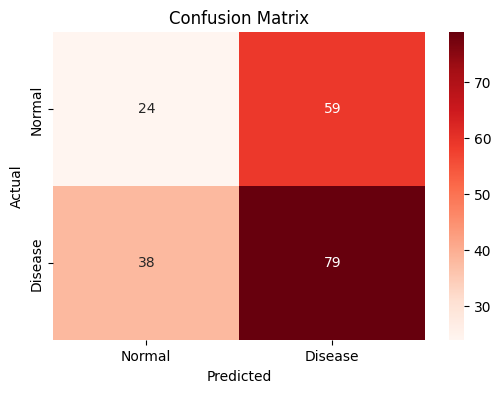

In [26]:
print("Classification Report for KNN model:\n", classification_report(y_test, KNN_pred))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, KNN_pred)
print("Confusion Matrix for knn model:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report for naive bayes:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75        83
           1       0.80      0.91      0.85       117

    accuracy                           0.81       200
   macro avg       0.82      0.79      0.80       200
weighted avg       0.81      0.81      0.81       200

Confusion Matrix for naive bayes model:
 [[ 56  27]
 [ 11 106]]


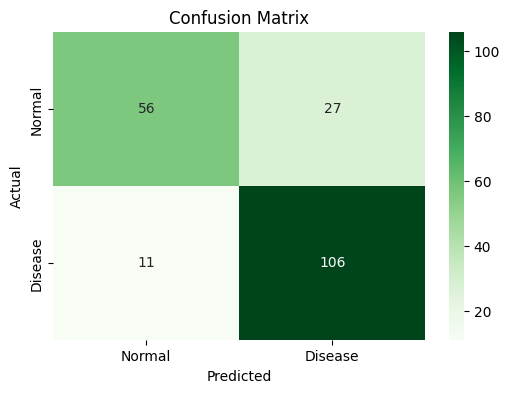

In [27]:
print("Classification Report for naive bayes:\n", classification_report(y_test, g_pred))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, g_pred)
print("Confusion Matrix for naive bayes model:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report for LOG model:
               precision    recall  f1-score   support

           0       0.69      0.40      0.50        83
           1       0.67      0.87      0.76       117

    accuracy                           0.68       200
   macro avg       0.68      0.63      0.63       200
weighted avg       0.68      0.68      0.65       200

Confusion Matrix for LOG model:
 [[ 33  50]
 [ 15 102]]


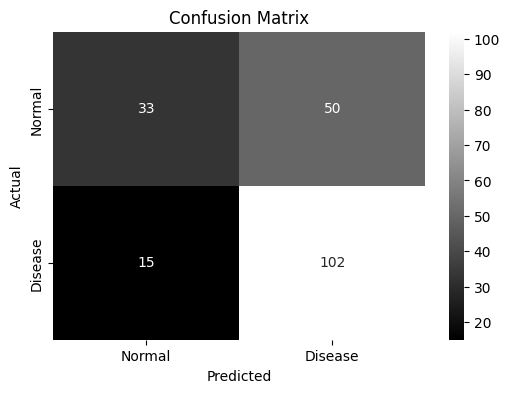

In [28]:
print("Classification Report for LOG model:\n", classification_report(y_test, LOG_pred))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, LOG_pred)
print("Confusion Matrix for LOG model:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='grey', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


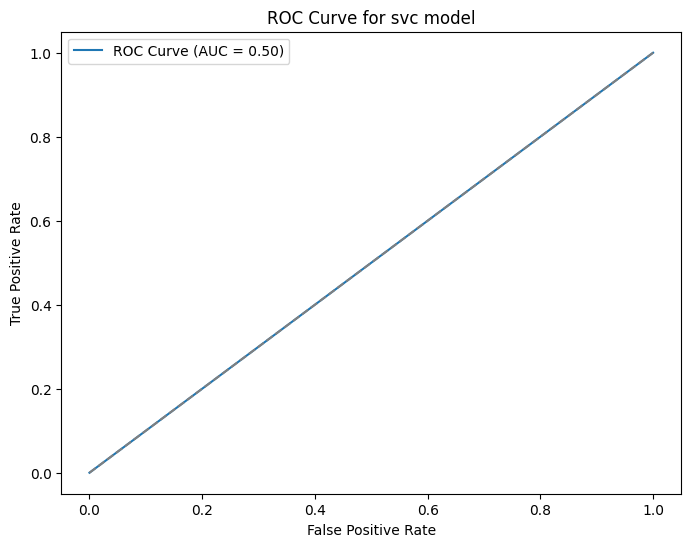

In [29]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test, SVC_pred)
fpr, tpr, _ = roc_curve(y_test, SVC_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for svc model')
plt.legend()
plt.show()

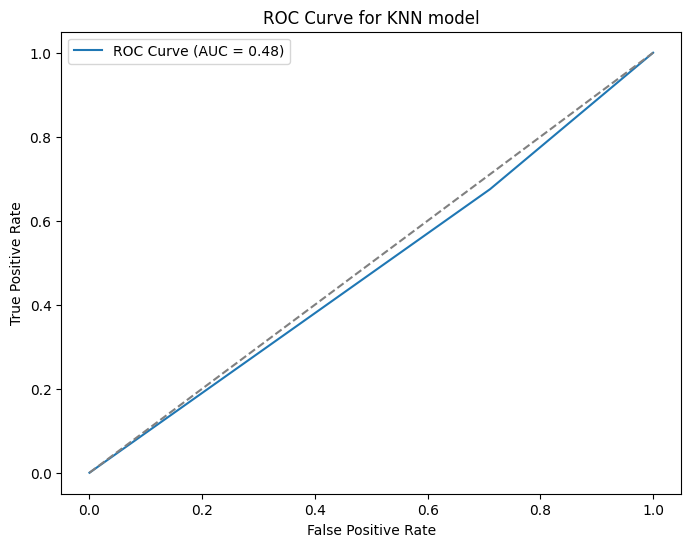

In [30]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test, KNN_pred)
fpr, tpr, _ = roc_curve(y_test, KNN_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN model')
plt.legend()
plt.show()

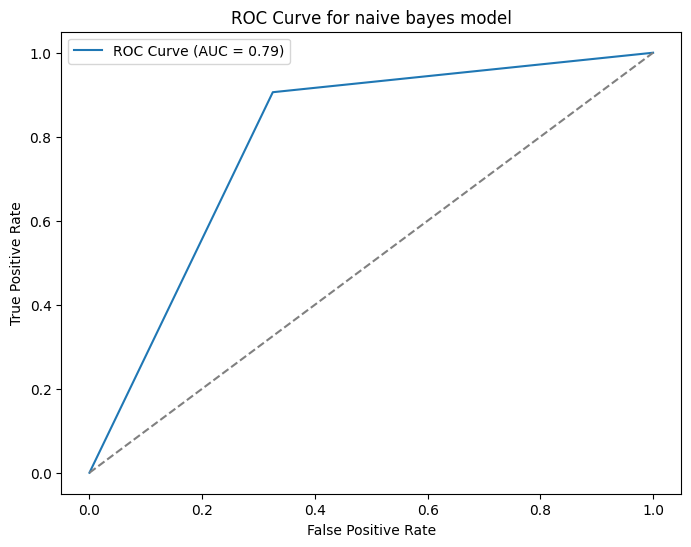

In [31]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test, g_pred)
fpr, tpr, _ = roc_curve(y_test, g_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for naive bayes model')
plt.legend()
plt.show()

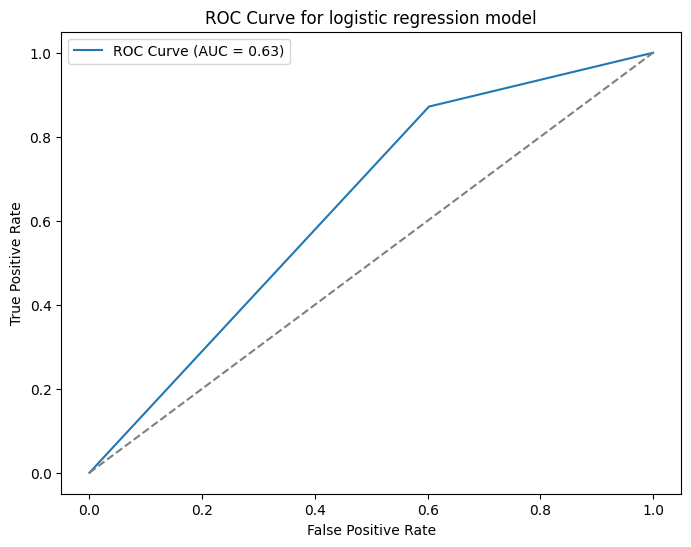

In [32]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test, LOG_pred)
fpr, tpr, _ = roc_curve(y_test, LOG_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic regression model')
plt.legend()
plt.show()

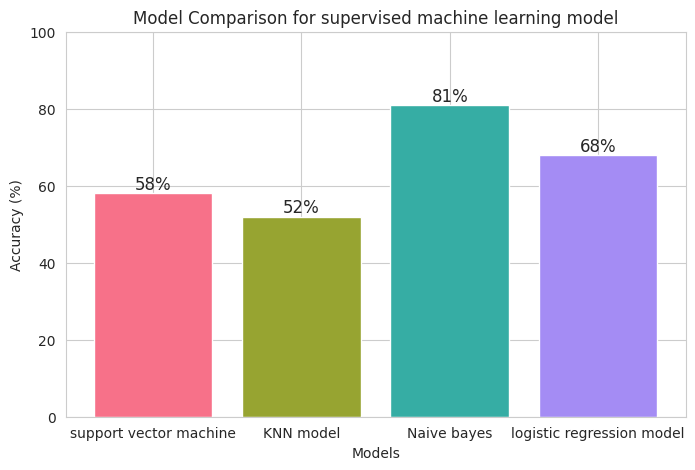

In [33]:
models = ['support vector machine', 'KNN model', 'Naive bayes', 'logistic regression model']
accuracy = [58,52,81,68]

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar chart with different colors
colors = sns.color_palette("husl", len(models))

plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=colors)

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison for supervised machine learning model")
plt.ylim(0, 100)  # Ensure full range visibility

# Display values on top of bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 1, str(v) + "%", ha='center', fontsize=12)

plt.show()

# Ensembled models

 Graident boosting

In [34]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)


 Bagging classifier

In [35]:
bc= BaggingClassifier()
bc.fit(X_train,y_train)
y_pred_bc=bc.predict(X_test)

stacking classifier

In [36]:
## stcaking classifier
# Create individual classifiers
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()

# Create the stacking classifier with a list of classifiers and a meta-classifier
stacking_clf = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=clf2)
# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_stack = stacking_clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


voting classifier

In [37]:
# Create the Voting Classifier with a list of base classifiers and the voting method
base_classifier1 = SVC()
base_classifier2 = DecisionTreeClassifier()
voting_clf = VotingClassifier(estimators=[('svm', base_classifier1), ('dtc', base_classifier2)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# model evaluation for ensembled models

Classification Report for gradient boosting:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.98      0.97      0.98       117

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Confusion Matrix for gradient boosting:
 [[ 81   2]
 [  3 114]]


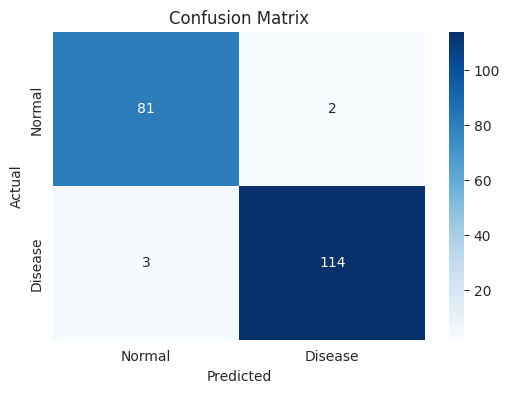

In [38]:
print("Classification Report for gradient boosting:\n", classification_report(y_test, y_pred_gbc))
# Confusion matrix
conf_matrix = confusion_matrix(y_test,  y_pred_gbc)
print("Confusion Matrix for gradient boosting:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Classification Report for bagging classifier:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.96      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix for bagging classifier:
 [[ 78   5]
 [  3 114]]


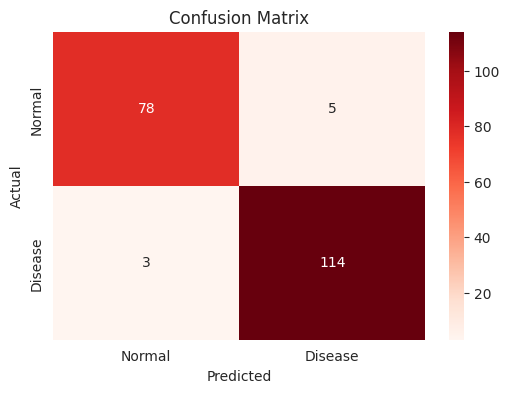

In [39]:
print("Classification Report for bagging classifier:\n", classification_report(y_test, y_pred_bc))
# Confusion matrix
conf_matrix = confusion_matrix(y_test,  y_pred_bc)
print("Confusion Matrix for bagging classifier:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Classification Report for stacking classifier:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        83
           1       0.98      0.98      0.98       117

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Confusion Matrix for stacking classifier model:
 [[ 81   2]
 [  2 115]]


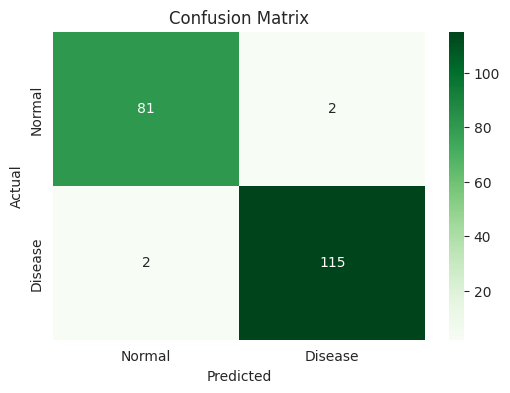

In [40]:
print("Classification Report for stacking classifier:\n", classification_report(y_test,y_pred_stack))
# Confusion matrix
conf_matrix = confusion_matrix(y_test,  y_pred_stack)
print("Confusion Matrix for stacking classifier model:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Classification Report for voting classifier:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        83
           1       0.95      0.98      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix for voting classifier model:
 [[ 77   6]
 [  2 115]]


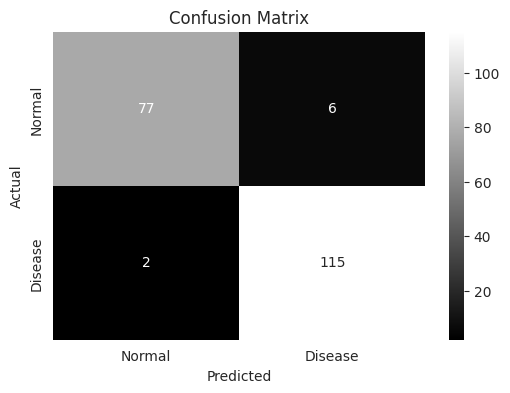

In [41]:
print("Classification Report for voting classifier:\n", classification_report(y_test,y_pred_voting))
# Confusion matrix
conf_matrix = confusion_matrix(y_test,  y_pred_voting)
print("Confusion Matrix for voting classifier model:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='grey', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



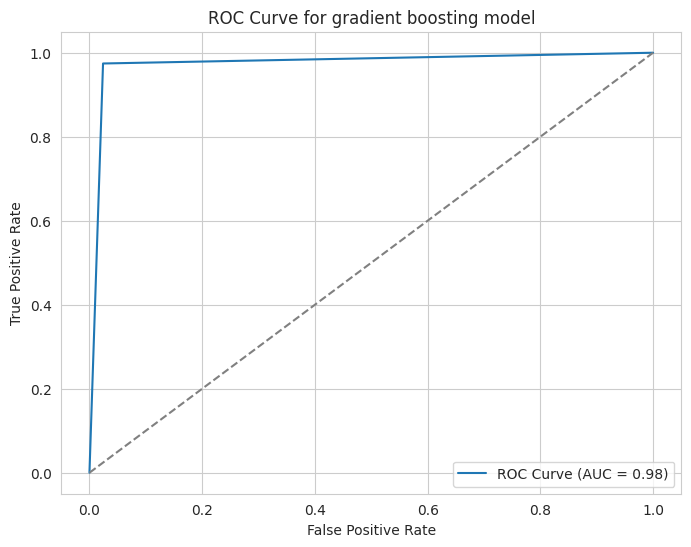

In [42]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test,y_pred_gbc)
fpr, tpr, _ = roc_curve(y_test, y_pred_gbc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for gradient boosting model')
plt.legend()
plt.show()

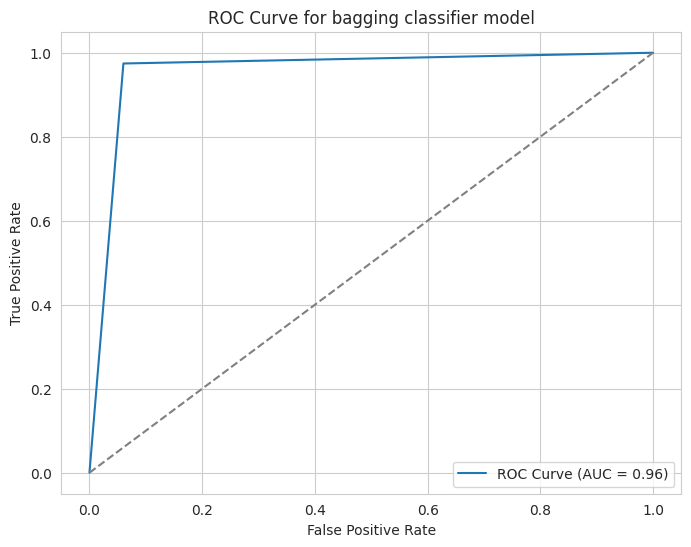

In [43]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test,y_pred_bc)
fpr, tpr, _ = roc_curve(y_test, y_pred_bc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for bagging classifier model')
plt.legend()
plt.show()

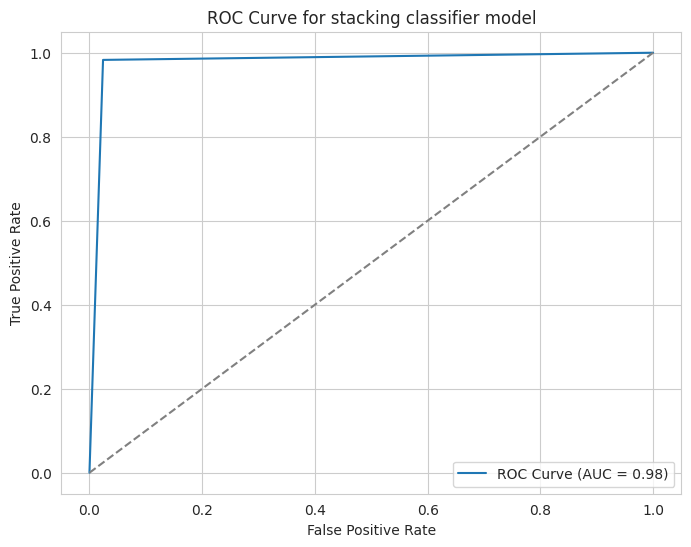

In [44]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test,y_pred_stack)
fpr, tpr, _ = roc_curve(y_test, y_pred_stack)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for stacking classifier model')
plt.legend()
plt.show()

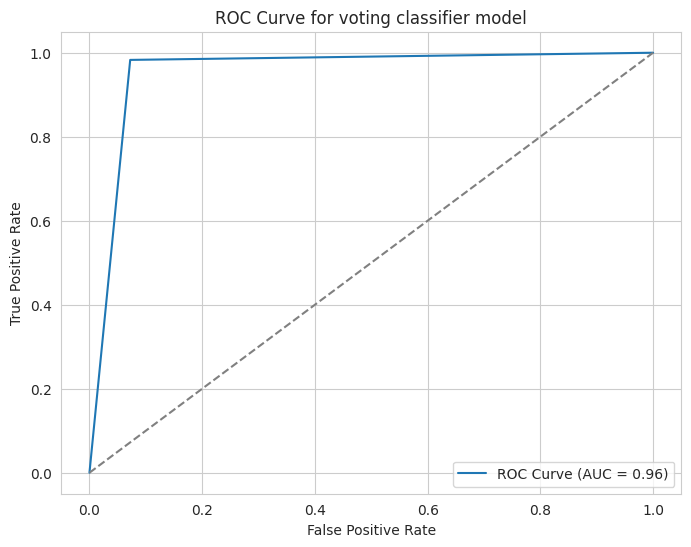

In [45]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test,y_pred_voting)
fpr, tpr, _ = roc_curve(y_test, y_pred_voting)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for voting classifier model')
plt.legend()
plt.show()

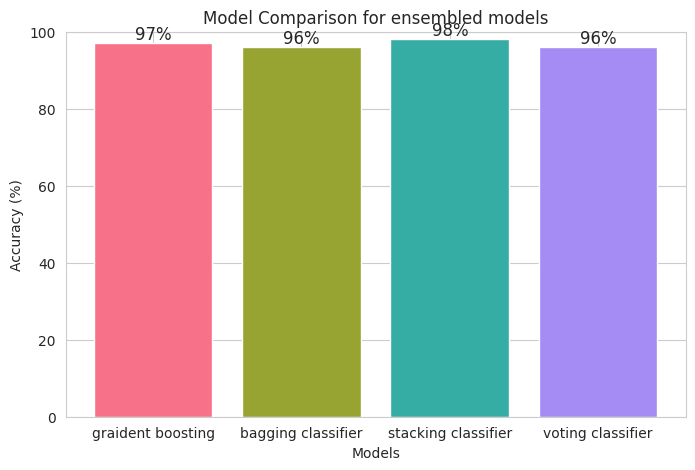

In [48]:
models = ['graident boosting', 'bagging classifier', 'stacking classifier', 'voting classifier']
accuracy = [97,96,98,96]

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar chart with different colors
colors = sns.color_palette("husl", len(models))

plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=colors)

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison for ensembled models")
plt.ylim(0, 100)  # Ensure full range visibility

# Display values on top of bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 1, str(v) + "%", ha='center', fontsize=12)

plt.show()

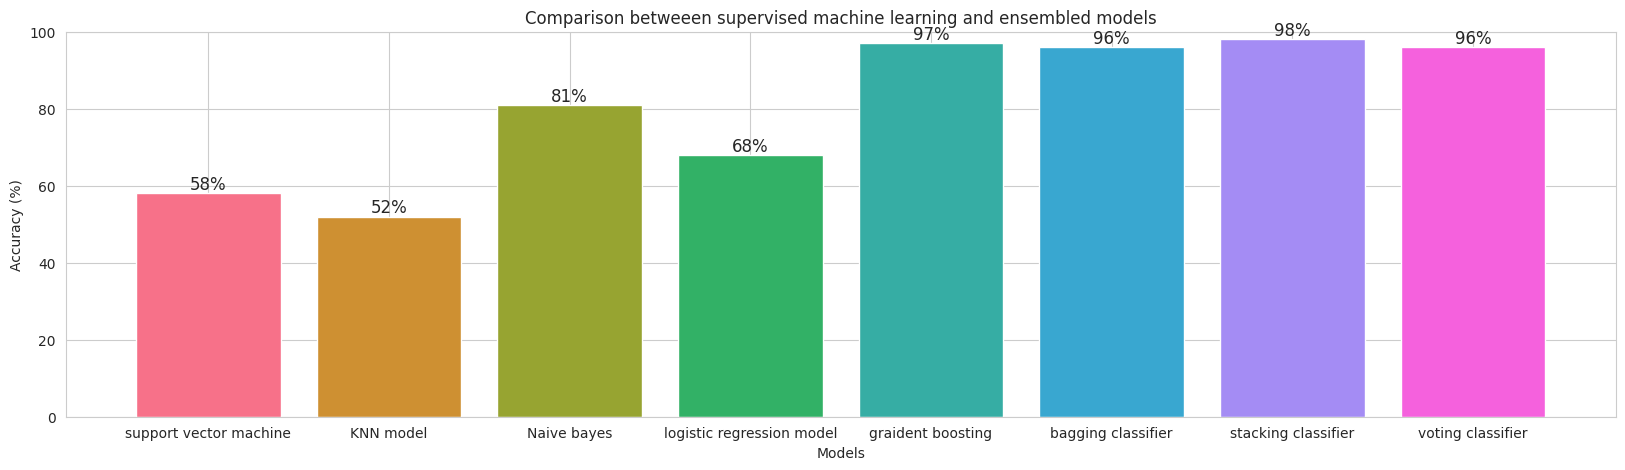

In [49]:
models = ['support vector machine', 'KNN model', 'Naive bayes', 'logistic regression model','graident boosting', 'bagging classifier', 'stacking classifier', 'voting classifier']
accuracy = [58,52,81,68,97,96,98,96]

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar chart with different colors
colors = sns.color_palette("husl", len(models))

plt.figure(figsize=(20, 5))
plt.bar(models, accuracy, color=colors)

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison betweeen supervised machine learning and ensembled models")
plt.ylim(0, 100)  # Ensure full range visibility

# Display values on top of bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 1, str(v) + "%", ha='center', fontsize=12)

plt.show()